In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets/
%ls

Mounted at /gdrive
/gdrive/MyDrive/Datasets
 Admission_Predict.csv
 Admission_Predict_Ver1.1.csv
'Breast Cancer Wisconsin Dataset.csv'
 cwurData.csv
 data.csv
 dataset_31_credit-g.csv
'default of credit card clients (1).xlsx'
'FIFA 19 Dataset.csv'


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

In [ ]:
df=pd.read_excel('default of credit card clients (1).xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
find='default payment next month'
y=df[find]
x=df.drop(find, inplace=False, axis=1)

In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [ ]:
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
cls=LogisticRegression().fit(x,y)
cls.score(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7787666666666667

In [ ]:
normalizer=Normalizer().fit(x)
nor_x=normalizer.transform(x)
nor_x

array([[4.84567551e-05, 9.69135102e-01, 9.69135102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66334102e-05, 9.98004610e-01, 1.66334102e-05, ...,
        8.31670508e-03, 0.00000000e+00, 1.66334102e-02],
       [2.99421634e-05, 8.98264903e-01, 1.99614423e-05, ...,
        9.98072115e-03, 9.98072115e-03, 4.99036057e-02],
       ...,
       [5.01297359e-01, 5.01330781e-01, 1.67110260e-05, ...,
        7.01863093e-02, 3.34220520e-02, 5.18041807e-02],
       [1.60826921e-01, 4.28886086e-01, 5.36107607e-06, ...,
        1.03254325e-02, 2.83944033e-01, 9.67138123e-03],
       [2.61128173e-01, 4.35213622e-01, 8.70427244e-06, ...,
        8.70427244e-03, 8.70427244e-03, 8.70427244e-03]])

In [ ]:
cls=LogisticRegression().fit(nor_x,y)
cls.score(nor_x,y)

0.7785

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(x)
std_x=scaler.transform(x)
std_x

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [ 1.7318776 , -0.67427636, -1.23432296, ..., -0.18512036,
         3.15253642, -0.19190359],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [ ]:
cls=LogisticRegression().fit(std_x,y)
cls.score(std_x,y)

0.8108666666666666

In [ ]:
y_pred=cls.predict(std_x)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

[[22737   627]
 [ 5047  1589]]


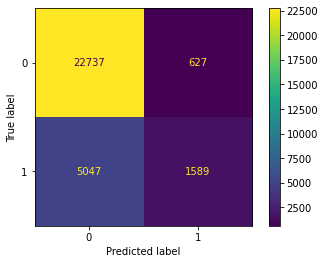

In [ ]:
mt=confusion_matrix(y,y_pred)
print(mt)
Mtpt=ConfusionMatrixDisplay(mt)
Mtpt.plot()

In [ ]:
pre,recall,f1,support=precision_recall_fscore_support(y,y_pred)
pre

array([0.81834869, 0.71705776])

In [ ]:
recall

array([0.97316384, 0.23945148])

In [ ]:
f1

array([0.88906702, 0.35901491])

In [ ]:
print("Support array is : ",support)

Support array is :  [23364  6636]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y,y_pred)
print("F1 score is : ",f1)

F1 score is :  0.35901491188431994
